In [47]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 4000
print("Module imported")

Module imported


In [7]:
#load data set

data=pd.read_csv("E:\PROJECTS\DATA VIZ MACD\mcdonaldata.csv")
data.head()


,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular


In [6]:
#about the dataset

data.info()
data.columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    object 
 3   calories    141 non-null    object 
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
 13  menu        141 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 15.5+ KB


,Unnamed: 0,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,70.000000,7.493333,10.060355,5.000099,1.108865,26.321128,30.770851,15.409504,10.336950,362.918809
std,40.847277,8.336949,10.435455,4.898097,7.319814,50.348006,20.664969,15.674007,14.283388,477.792553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.650000,0.460000,0.330000,0.070000,1.470000,15.630000,2.280000,0.000000,41.990000
50%,70.000000,4.790000,7.770000,4.270000,0.150000,8.390000,29.880000,9.160000,3.640000,150.900000
75%,105.000000,10.880000,14.160000,7.280000,0.250000,31.110000,45.390000,26.950000,19.230000,530.540000
max,140.000000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


In [21]:
#Check for null values
data.isnull().sum()

Unnamed: 0    0
item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

In [76]:
grouped_data = data.groupby('menu')

group_statistics = grouped_data[['protien', 'totalfat', 'carbs', 'sugar', 'sodium']].agg(['mean', 'median', 'min', 'max'])

print(group_statistics)

              protien                        totalfat                        \
                 mean  median   min    max       mean  median    min    max   
menu                                                                          
beverage     0.268235   0.000  0.00   1.52   0.308824   0.000   0.00   1.75   
breakfast   11.822500  10.855  1.93  22.46  12.101250  12.060   7.32  15.94   
condiments   0.731111   0.510  0.00   3.06   3.876667   0.490   0.00  23.45   
dessert      3.012500   2.955  1.54   5.42   5.219167   5.460   1.77   9.76   
gourmet     21.684545  22.440  8.48  39.47  28.550909  29.300  13.09  45.18   
mccafe       4.343542   3.770  0.07  12.08   5.632083   4.415   0.03  18.89   
regular     12.990833  11.265  0.00  34.00  17.625833  14.500   0.00  39.45   

                carbs                            sugar                        \
                 mean  median    min    max       mean  median    min    max   
menu                                             

In [19]:
unique_items=data["menu"].unique()
print(f"No of unique items are:{unique_items} ,{len(unique_items)}")
unique_food_items=data["item"].unique()
print(len(unique_food_items))

'''Group Data by menu'''
grouped_data_by_menu=data.groupby("menu").mean()
grouped_data_by_menu.head()


No of unique items are:['regular' 'breakfast' 'mccafe' 'dessert' 'gourmet' 'beverage'
 'condiments'] ,7
141


,Unnamed: 0,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
menu,,,,,,,,,,
beverage,123.0,0.268235,0.308824,0.225882,0.032353,0.829412,34.025294,34.677059,34.025882,36.358824
breakfast,39.5,11.822500,12.101250,6.391250,0.180000,106.946250,33.560000,5.206250,2.287500,644.766250
condiments,136.0,0.731111,3.876667,0.608889,0.136667,1.834444,8.287778,6.104444,1.691111,120.577778
dessert,97.5,3.012500,5.219167,3.548333,0.100833,6.525000,33.525000,23.148333,16.554167,93.543333
gourmet,109.0,21.684545,28.550909,11.987636,0.194545,73.210909,49.179091,8.799091,4.811818,1207.961818


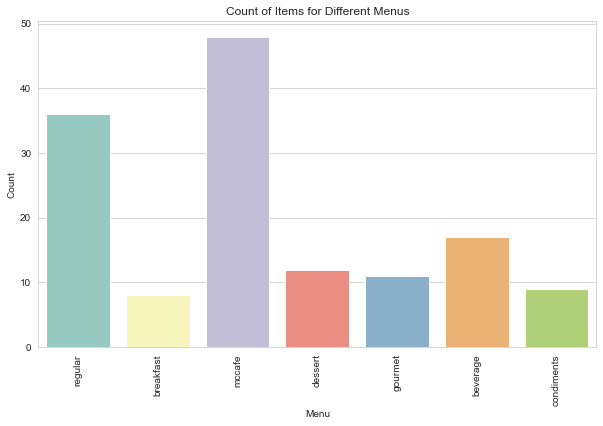

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='menu', palette='Set3')
plt.xlabel('Menu')
plt.ylabel('Count')
plt.title('Count of Items for Different Menus')
plt.xticks(rotation=90)
plt.show()

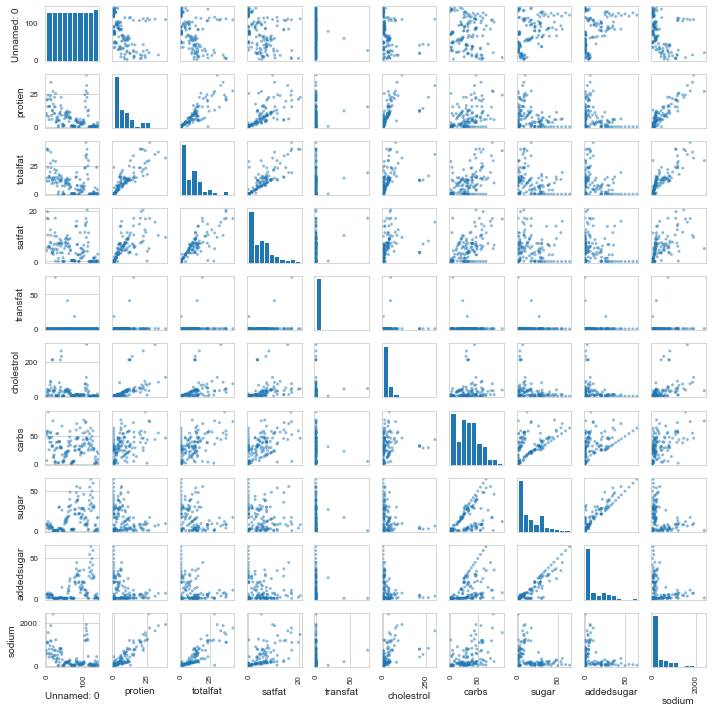

In [66]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.tight_layout()
plt.show()

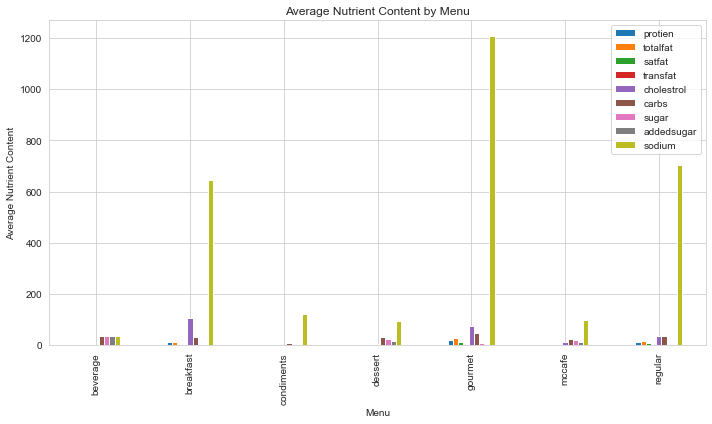

In [65]:
# Bar plot of average nutrient content by menu
avg_nutrient_by_menu = data.groupby('menu').mean().drop(columns=['Unnamed: 0'])
avg_nutrient_by_menu.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Menu')
plt.ylabel('Average Nutrient Content')
plt.title('Average Nutrient Content by Menu')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

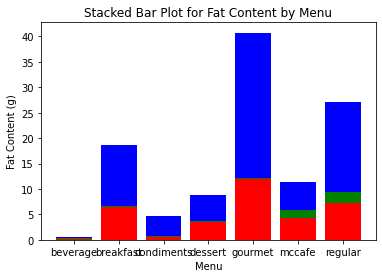

In [41]:
'''
Data Analysis according to menu
'''

#barplots 
sfat = grouped_data_by_menu['satfat']
transfat = grouped_data_by_menu['transfat']
totalfat = grouped_data_by_menu['totalfat']

# Get the unique menu items
menu_items = grouped_data_by_menu.index

colors = ['red', 'green', 'blue']

# Create a stacked bar plot for each menu item
for i, item in enumerate(menu_items):
    plt.bar(item, sfat[item], label='Saturated Fat', color=colors[0])
    plt.bar(item, transfat[item], bottom=sfat[item], label='Trans Fat', color=colors[1])
    plt.bar(item, totalfat[item], bottom=sfat[item] + transfat[item], label='Total Fat', color=colors[2])

# Set the title and labels for the plot
plt.title('Stacked Bar Plot for Fat Content by Menu')
plt.xlabel('Menu')
plt.ylabel('Fat Content (g)')

# Add a legend
#plt.legend()

# Display the plot
plt.show()

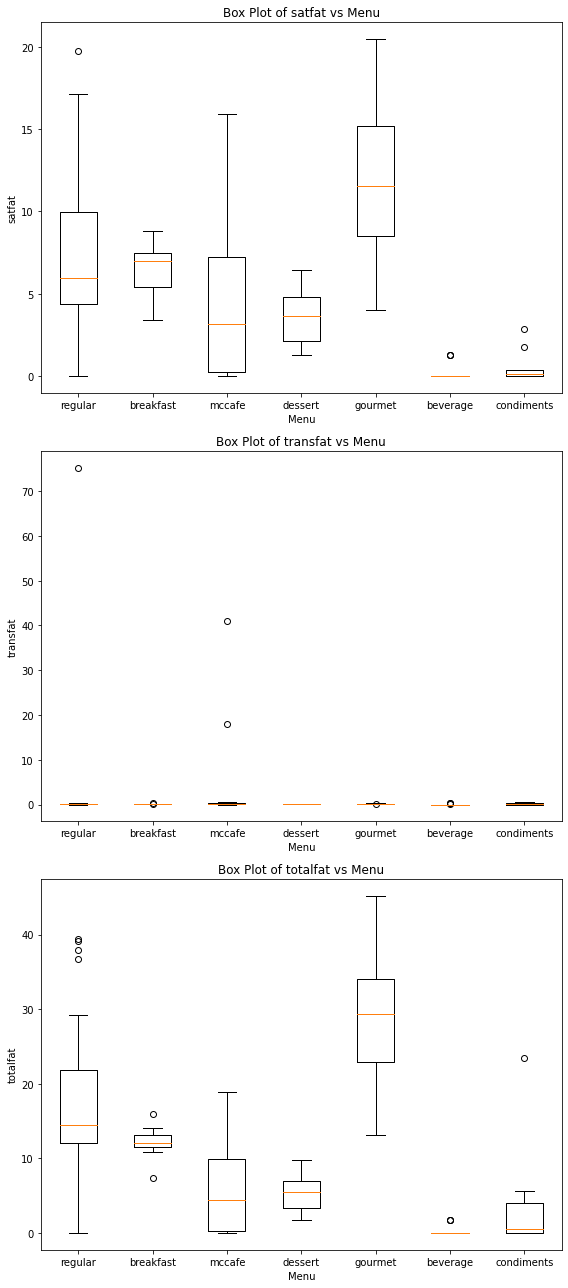

In [43]:
menu_items = data['menu'].unique()


fig, axs = plt.subplots(len(attributes), 1, figsize=(8, 6 * len(attributes)))

for i, attribute in enumerate(attributes):
    
    axs[i].boxplot([data[data['menu'] == item][attribute] for item in menu_items], labels=menu_items)
    axs[i].set_title(f'Box Plot of {attribute} vs Menu')
    axs[i].set_xlabel('Menu')
    axs[i].set_ylabel(attribute)


plt.tight_layout()


plt.show()

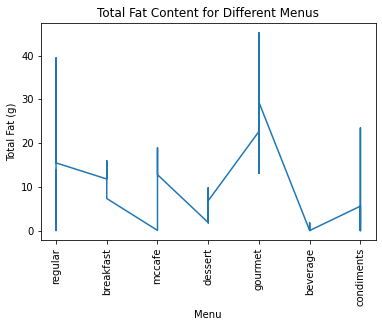

In [50]:
plt.plot(data['menu'], data['totalfat'])
plt.xlabel('Menu')
plt.ylabel('Total Fat (g)')
plt.title('Total Fat Content for Different Menus')
plt.xticks(rotation=90)
plt.show()

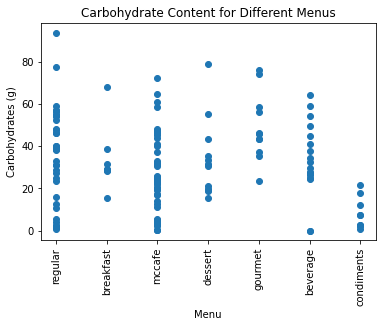

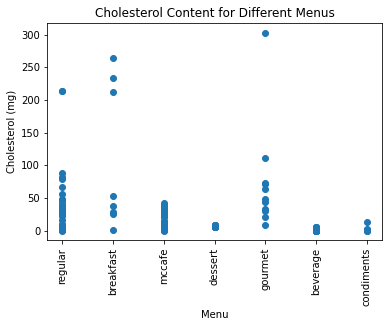

In [52]:
# Scatter plot
plt.scatter(data['menu'], data['carbs'])
plt.xlabel('Menu')
plt.ylabel('Carbohydrates (g)')
plt.title('Carbohydrate Content for Different Menus')
plt.xticks(rotation=90)
plt.show()


plt.scatter(data['menu'], data['cholestrol'])
plt.xlabel('Menu')
plt.ylabel('Cholesterol (mg)')
plt.title('Cholesterol Content for Different Menus')
plt.xticks(rotation=90)
plt.show()

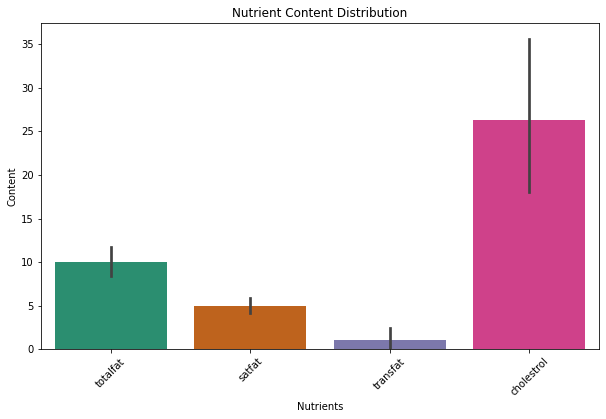

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data[[ 'totalfat', 'satfat', 'transfat', 'cholestrol']], palette='Dark2')
plt.xlabel('Nutrients')
plt.ylabel('Content')
plt.title('Nutrient Content Distribution')
plt.xticks(rotation=45)
plt.show()

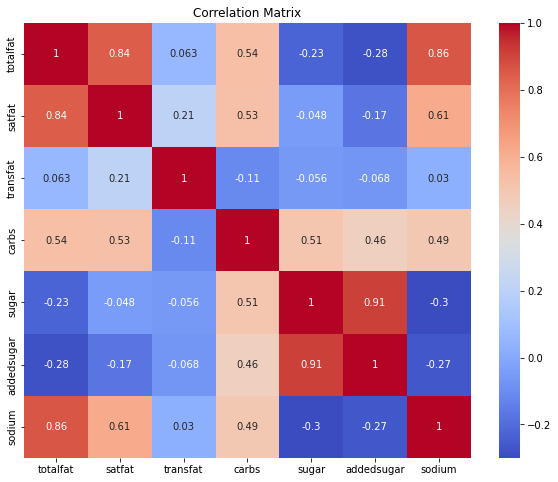

In [57]:
# Heatmap (correlation matrix) with color encoding
corr_matrix = data[['totalfat', 'satfat', 'transfat', 'carbs', 'sugar', 'addedsugar', 'sodium']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

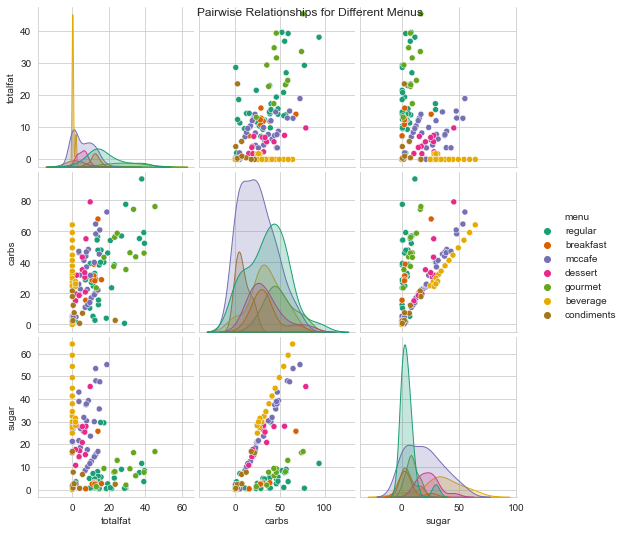

In [60]:
sns.set_style('whitegrid')
sns.pairplot(data=data[['totalfat', 'carbs', 'sugar', 'menu']], hue='menu', palette='Dark2')
plt.suptitle('Pairwise Relationships for Different Menus')
plt.show()

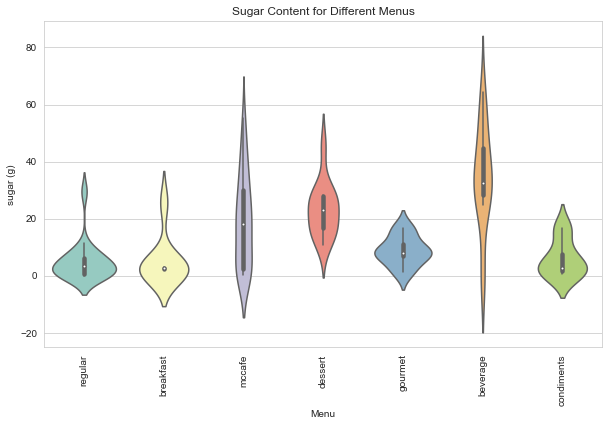

In [70]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='menu', y='sugar', palette='Set3')
plt.xlabel('Menu')
plt.ylabel('sugar (g)')
plt.title('Sugar Content for Different Menus')
plt.xticks(rotation=90)
plt.show()

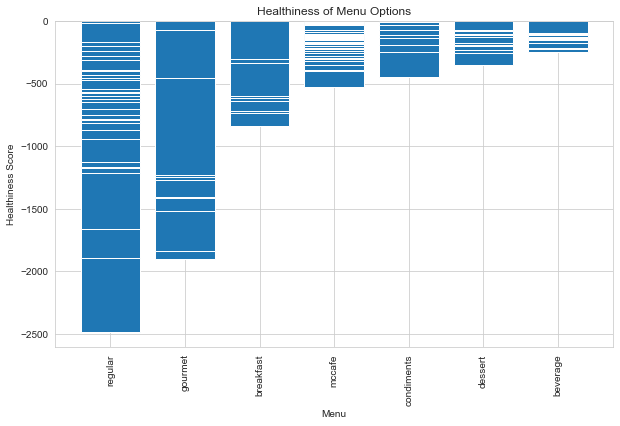

In [71]:
data['healthiness_score'] = - data['totalfat'] - data['satfat'] - data['transfat'] + data['cholestrol'] - data['carbs'] - data['sugar'] - data['addedsugar'] - data['sodium']

sorted_data = data.sort_values('healthiness_score')

# Plot the healthiness scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['menu'], sorted_data['healthiness_score'])
plt.xlabel('Menu')
plt.ylabel('Healthiness Score')
plt.title('Healthiness of Menu Options')
plt.xticks(rotation=90)
plt.show()

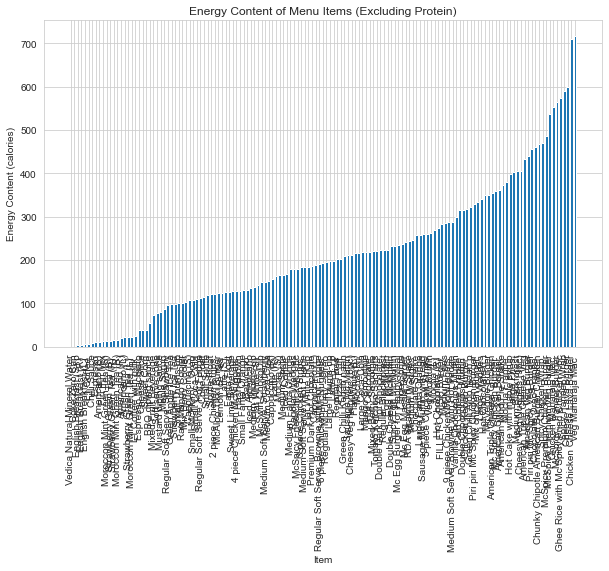

In [75]:
# Calculate the energy content without protein for each menu item
data['energy_content'] = data['totalfat'] * 9 + data['carbs'] * 4
sorted_data = data.sort_values('energy_content')

# Plot the energy content
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['item'], sorted_data['energy_content'])
plt.xlabel('Item')
plt.ylabel('Energy Content (calories)')
plt.title('Energy Content of Menu Items (Excluding Protein)')
plt.xticks(rotation=90)
plt.show()